In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Funções e constantes que serão utilizadas

permeabilidadeAr = 1

def campoBobina(x,espiras,corrente,permeabilidade,raio):
    '''
    Recebe:
        x: distância do centro da bobina
        espiras: quantidade de espiras
        corrente: corrente que está passando na bobina
        permeabilidade: permeabilidade elétrica do meio em que o experimento é feito
        raio: raio da bobina
        
    Retorna:
        Campo Magnético
    '''
    
    return espiras * (permeabilidade * corrente * raio **2)/(2*(x**2 + raio**2)**(3/2))

def campoHall(tensao,coeficiente):
    '''
    Recebe:
        tensao: Tensão Hall medida com a sonda
        coeficiente: o valor obtido durante a calibração
        
    Retorna:
        Campo Magnético naquele ponto
    '''
    
    
    return tensao/coeficiente

def campoSolenoide(espiras,corrente,comprimento,permeabilidade):
    '''
    Recebe:
        espiras: quantidade de espiras
        corrente: corrente passando pelo solenoide
        comprimento: comprimento do solenoide
        permeabilidade: permeabilidade magnética do meio
        
    Retorna:
        Campo Magnético do solenoide
    '''
    
    return (permeabilidade*espiras*corrente)/comprimento

### Calibração da Sonda Hall

In [3]:
comprimentoSolenoide = 149/1e-3 #erro de 5e-5
espirasSolenoide = 760

[2.96027066e-03 9.98014768e-07]


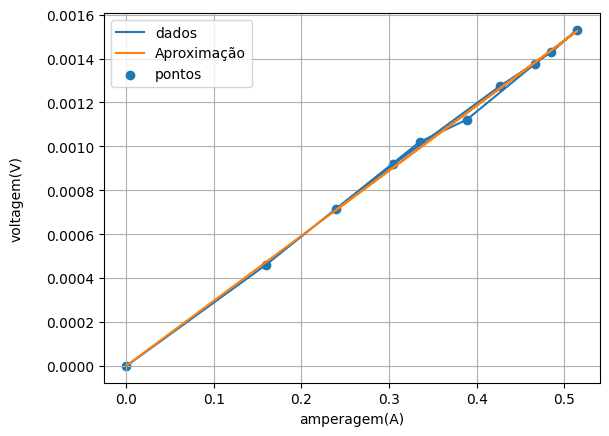

In [10]:
with open('calibracao.csv','r') as file:
    xtype,ytype = file.readline().split(',')
    x,y = [],[]
    for linha in file.readlines():
        linha = linha.split(',')
        x.append(float(linha[0]))
        y.append(float(linha[1]))
        
campo = [campoSolenoide(espirasSolenoide,i,comprimentoSolenoide,permeabilidadeAr) for i in x]
    
param = np.polyfit(y,campo,1)
print(param)
    
plt.plot(y,campo,label='dados')
plt.plot(y,[(param[0]*i + param[1]) for i in y],label=f'Aproximação')
plt.scatter(y,campo,label='pontos')
plt.grid(True)
plt.xlabel(xtype);plt.ylabel(ytype)
plt.legend()
plt.show()

coeficienteHall = param[0]

[ 2.94083086e-03 -1.89427888e-05]


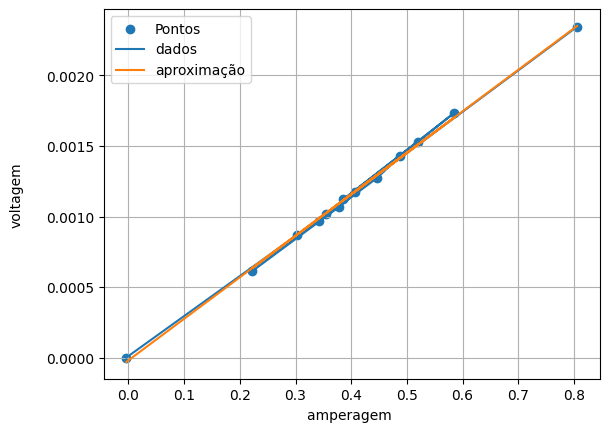

In [12]:
with open('calibracao-segundodDia.csv','r') as file:
    xtype,ytype = file.readline().split(',')
    x,y = [],[]
    for linha in file.readlines():
        linha = linha.split(',')
        x.append(float(linha[0]))
        y.append(float(linha[1]))
        
campo = [campoSolenoide(espirasSolenoide,i,comprimentoSolenoide,permeabilidadeAr) for i in x]
    
param = np.polyfit(y,campo,1)
print(param)
    
plt.scatter(y,campo,label='Pontos')
plt.plot(y,campo,label='dados')
plt.plot(y,[(param[0]*i + param[1]) for i in y],label='aproximação')
plt.grid(True)
plt.xlabel(xtype);plt.ylabel(ytype)
plt.legend()
plt.show()

coeficienteHall = param[0]


### Medida do Campo Magnético de uma Bobina

Primeiramente medir os parâmetros da bobina -> diâmetro, numero de espiras

Colocar a sonda hall no suporte e medir sem corrente -> medir tensão de fundo

Corrente em 1 A e medir com a sonda variando a distância da bobina -> fazer antes, dentro e depois da bobina

Inverter o sentido da corrente na bobina e ver o que acontece

Fazer um gráfico do campo medido com o campo esperado em função de x

In [31]:
#Dados
espiras = None
corrente = 1
raio = None
permeabilidade = 1 #sei não viu
tensaoFundo = 0.0028

In [ ]:
with open('bobina.csv','r') as file:
    xtype,ytype = file.readline().split(',')
    x,y = [],[]
    for linha in file.readlines():
        linha = linha.split(',')
        x.append(float(linha[0]))
        y.append(float(linha[1]))
        
campoCalculado = [campoBobina(i,espiras,corrente,permeabilidade,raio) for i in x]

plt.plot(x,campoCalculado,label='Campo Calculado')
plt.plot(x,[campoHall(i,coeficiente) for i in x])
plt.grid(True)
plt.show()

### Campo Magnético de um par de Bobina (Helmholtz)

Medir as características das bobinas -> diâmetro, quantidade de espiras

Colocar uma na frente da outra e colocar a corrente igual nas duas (soma os campos magnéticos)

Corrente em 1 A, medir a tensão hall em pontos entre as bobinas e depois de cada uma das bobinas

Fazer um gráfico com o campo magnético medido e o calculado, em função da distância do centro das bobinas

### Campo Magnético de Bobina anti-Helmholtz

Repita os procedimentos do método de helmholtz, porém com a corrente de uma das bobinas trocadas

Percebemos que o sinal da tensão Hall depende do lado que tá virado o sensor

Medimos as posições na régua, depois precisa pegar o meio e ir fazendo a posição correta pra pornográfico

13.1 - 15.9 -> Pontos de uma bobina

### Anti-Helmanz
Meio -> 19.9 cm

Utilizando uma bussola, reparamos que, no meio, ela marca corretamente

colocar um erro de mais ou menos 1 cm na posição porque não sabemos onde exatamente a sonda mede

Tamanho da sonda -> +- 4.5 cm